In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
beers = pd.read_csv("./dataset_BeerReviews/BeerAdvocate/beers.csv")
breweries = pd.read_csv("./dataset_BeerReviews/BeerAdvocate/breweries.csv")
users = pd.read_csv("./dataset_BeerReviews/BeerAdvocate/users.csv")

# Exploring the data

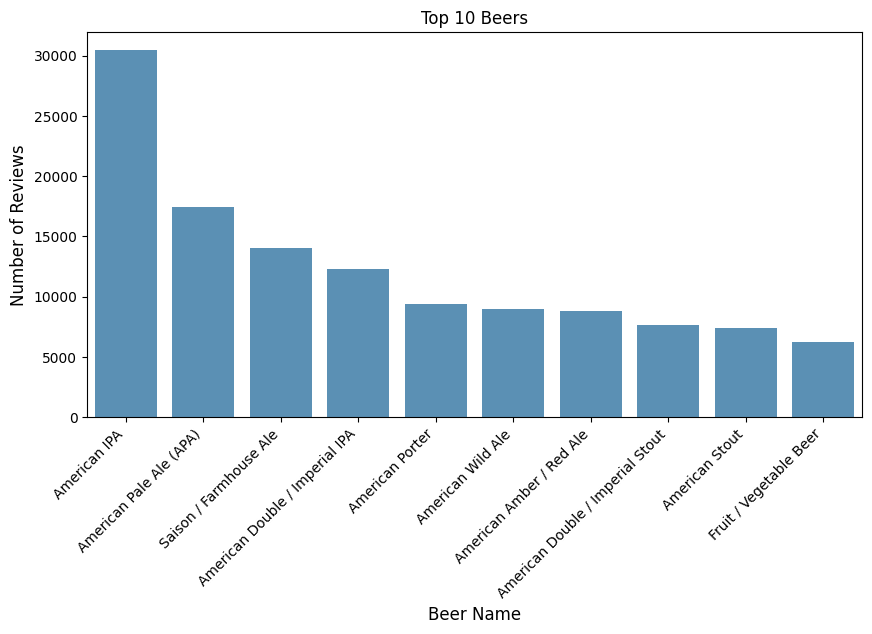

In [3]:
# Find top rated beers
beer_count = beers['style'].value_counts()
beer_count = beer_count[:10,]

plt.figure(figsize=(10,5))
sns.barplot(x=beer_count.index, y=beer_count.values, alpha=0.8)
plt.title('Top 10 Beers')
plt.ylabel('Number of Reviews', fontsize=12)
plt.xlabel('Beer Name', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

In [4]:
beers.sort_values(by=['nbr_reviews'], ascending=False).head(10)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
180458,2093,90 Minute IPA,64,Dogfish Head Brewings & Eats,American Double / Imperial IPA,15548,3899,4.24,94.0,96.0,9.0,4.273975,NaN,0,NaN
226278,11757,Founders Breakfast Stout,1199,Founders Brewing Company,American Double / Imperial Stout,16509,3811,4.47,99.0,100.0,8.3,4.513760,NaN,0,NaN
77815,412,Old Rasputin Russian Imperial Stout,112,North Coast Brewing Co.,Russian Imperial Stout,12194,3722,4.28,95.0,97.0,9.0,4.301165,NaN,0,NaN
79091,7971,Pliny The Elder,863,Russian River Brewing Company,American Double / Imperial IPA,14436,3690,4.60,100.0,100.0,8.0,4.647832,NaN,0,NaN
225955,1093,Two Hearted Ale,287,"Bell's Brewery, Inc.",American IPA,14305,3561,4.26,95.0,90.0,7.0,4.268453,NaN,0,NaN
225867,17112,Hopslam Ale,287,"Bell's Brewery, Inc.",American Double / Imperial IPA,13026,3527,4.43,98.0,94.0,10.0,4.462041,NaN,0,NaN
82585,1904,Sierra Nevada Celebration Ale,140,Sierra Nevada Brewing Co.,American IPA,10221,3466,4.15,93.0,97.0,6.8,4.148169,NaN,0,NaN
226360,19960,Founders KBS (Kentucky Breakfast Stout),1199,Founders Brewing Company,American Double / Imperial Stout,12599,3221,4.56,100.0,NaN,11.8,4.607697,NaN,0,NaN
97619,4083,Stone Ruination IPA,147,Stone Brewing,American Double / Imperial IPA,10821,3075,4.28,95.0,97.0,8.2,4.295816,NaN,0,NaN
76313,92,Arrogant Bastard Ale,43153,Arrogant Brewing,American Strong Ale,10597,3066,4.17,93.0,97.0,7.2,4.153120,NaN,0,NaN


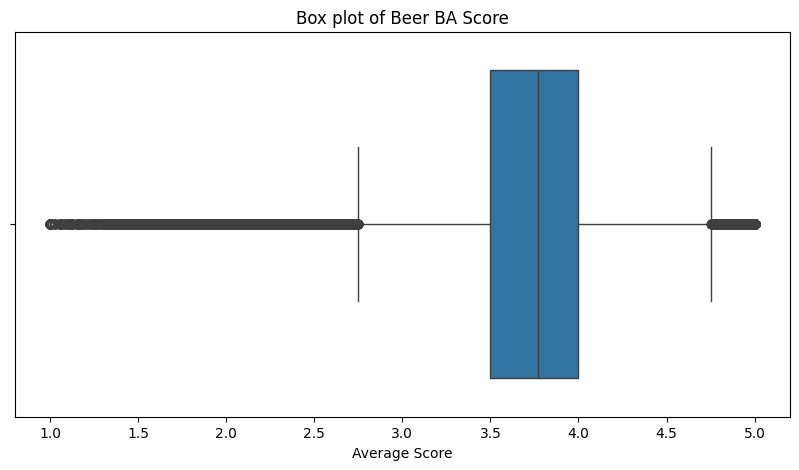

In [5]:
plt.figure(figsize=(10,5))
sns.boxplot(x=beers['avg_computed'])
plt.title('Box plot of Beer BA Score')
plt.xlabel('Average Score')
plt.show()


/var/folders/88/yy00sf_x3pl6hnnmlcr58hdw0000gn/T/ipykernel_76603/2738060687.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(beers['avg_computed'], kde=False)


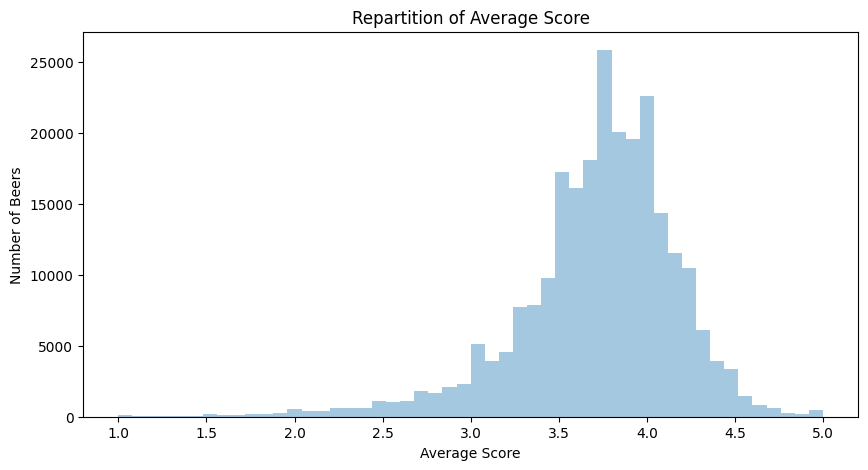

In [6]:
plt.figure(figsize=(10,5))
sns.distplot(beers['avg_computed'], kde=False)
plt.title('Repartition of Average Score')
plt.xlabel('Average Score')
plt.ylabel('Number of Beers')
plt.show()


/var/folders/88/yy00sf_x3pl6hnnmlcr58hdw0000gn/T/ipykernel_76603/3729251245.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(beers['avg'], kde=False)


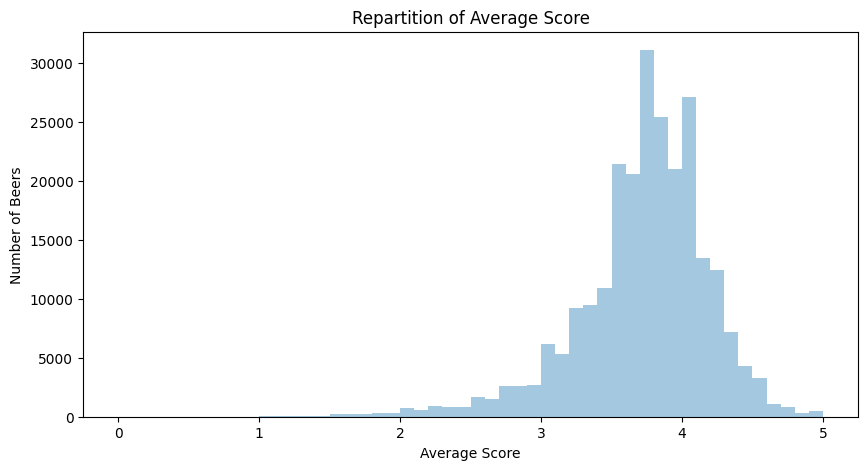

In [13]:
plt.figure(figsize=(10,5))
sns.distplot(beers['avg'], kde=False)
plt.title('Repartition of Average Score')
plt.xlabel('Average Score')
plt.ylabel('Number of Beers')
plt.show()


In [7]:
beers.avg_computed.describe()

count    247982.000000
mean          3.717594
std           0.464248
min           1.000000
25%           3.500000
50%           3.770000
75%           4.000000
max           5.000000
Name: avg_computed, dtype: float64

In [8]:
# Assigning a category code to each beer style and brewery name
beers['brewery_name'] = beers['brewery_name'].astype('category').cat.codes
beers['style'] = beers['style'].astype('category').cat.codes
beers.head()

# Dropping beer name and beer id for correlation matrix
beers_for_corr = beers.drop(['beer_name', 'beer_id'], axis=1)
beers_for_corr.head()

# Correlation matrix
!pip install jinja2
corr = beers_for_corr.corr()
corr.style.background_gradient(cmap='coolwarm')



,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
brewery_id,1.000000,0.013110,-0.073602,-0.102639,-0.128211,0.150030,0.209654,0.091961,0.005680,0.156291,0.048156,-0.035817,0.164945
brewery_name,0.013110,1.000000,-0.006722,-0.005333,-0.007243,0.031159,0.050141,0.008801,-0.012609,0.031003,0.031464,-0.000663,0.033086
style,-0.073602,-0.006722,1.000000,-0.006412,0.004350,-0.062533,-0.064595,0.010591,-0.085876,-0.065202,-0.066960,-0.001860,-0.080395
nbr_ratings,-0.102639,-0.005333,-0.006412,1.000000,0.942421,0.046237,0.163546,0.127492,0.055500,0.048849,0.082055,0.220121,0.067768
nbr_reviews,-0.128211,-0.007243,0.004350,0.942421,1.000000,0.030110,0.106809,0.132040,0.048006,0.031793,0.061470,0.234523,0.040019
avg,0.150030,0.031159,-0.062533,0.046237,0.030110,1.000000,0.878633,0.754173,0.289790,0.968129,0.940803,0.016761,0.955552
ba_score,0.209654,0.050141,-0.064595,0.163546,0.106809,0.878633,1.000000,0.703531,0.363884,0.861999,0.833818,0.055397,0.818839
bros_score,0.091961,0.008801,0.010591,0.127492,0.132040,0.754173,0.703531,1.000000,0.267236,0.747996,0.608181,0.040495,0.611495
abv,0.005680,-0.012609,-0.085876,0.055500,0.048006,0.289790,0.363884,0.267236,1.000000,0.304570,0.252218,0.014570,0.242924
avg_computed,0.156291,0.031003,-0.065202,0.048849,0.031793,0.968129,0.861999,0.747996,0.304570,1.000000,0.977679,0.017516,0.890702


In [9]:
beers_for_corr.head(5)

,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,39912,219,53,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,39912,219,53,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,39912,219,53,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,39912,219,53,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,39912,219,53,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN


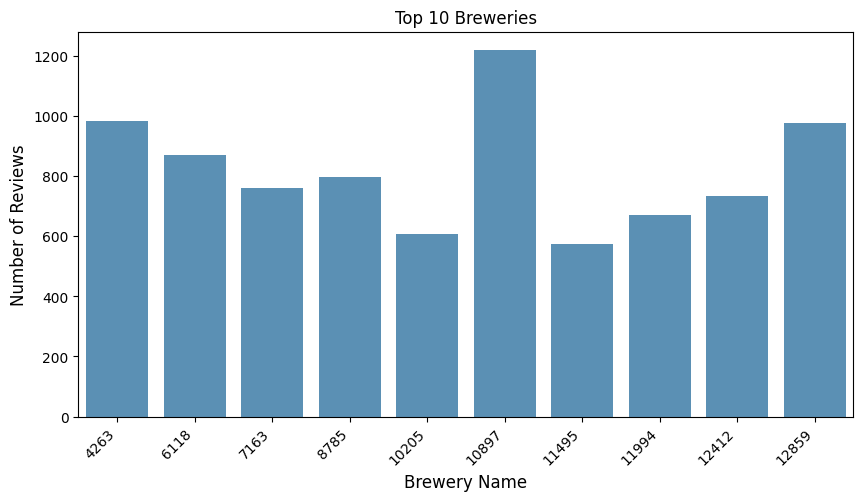

In [10]:
# Find most reviewed breweries
breweries_count = beers['brewery_name'].value_counts()
breweries_count = breweries_count[:10,]

plt.figure(figsize=(10,5))
sns.barplot(x=breweries_count.index, y=breweries_count.values, alpha=0.8)
plt.title('Top 10 Breweries')
plt.ylabel('Number of Reviews', fontsize=12)
plt.xlabel('Brewery Name', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

In [11]:
breweries

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2
...,...,...,...,...
16753,128,Germany,Privatbrauerei Franz Joseph Sailer,6
16754,5023,Aruba,Aruba Brewing,0
16755,1573,"United States, New York",John Harvard’s Brewery & Ale House,491
16756,16186,"United States, North Carolina",Triangle Brewing Company,20


In [15]:
# Assigning a category code to each brewery name
breweries['location'] = breweries['location'].astype('category').cat.codes

# Dropping brewery id for correlation matrix
breweries_for_corr = breweries.drop(['id', 'name'], axis=1)

# Correlation matrix
!pip install jinja2
corr = breweries_for_corr.corr()
corr.style.background_gradient(cmap='coolwarm')

,location,nbr_beers
location,1.000000,0.163512
nbr_beers,0.163512,1.000000


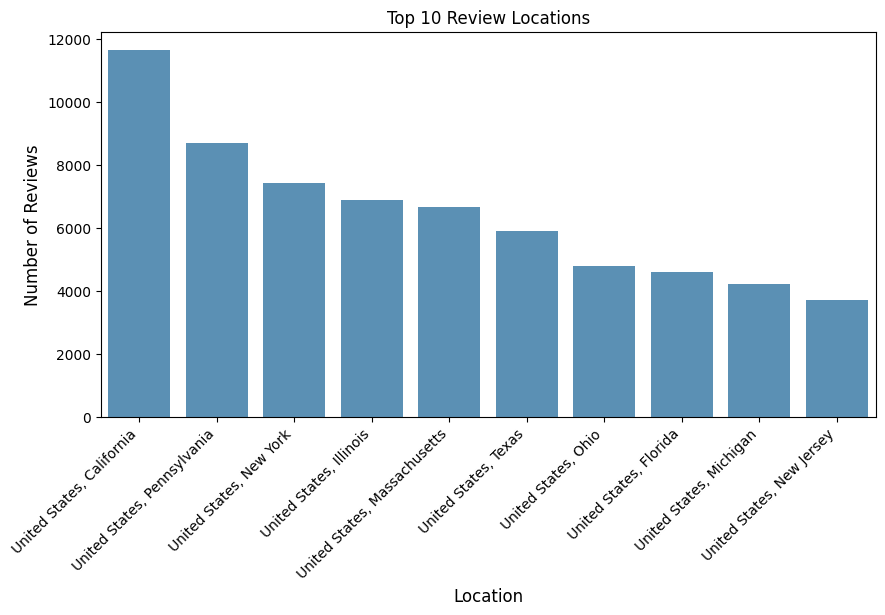

In [ ]:
# Find where do the most reviews come from
loc_count = users['location'].value_counts()
loc_count = loc_count[:10,]

plt.figure(figsize=(10,5))
sns.barplot(x=loc_count.index, y=loc_count.values, alpha=0.8)
plt.title('Top 10 Review Locations')    
plt.ylabel('Number of Reviews', fontsize=12)
plt.xlabel('Location', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()